<a href="https://colab.research.google.com/github/aakarshhh/AI_ML/blob/main/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install yfinance 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as dr
import datetime as dt 
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import  Dense , Dropout ,LSTM ,BatchNormalization

In [18]:
company=''
for i in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0] :
  company+=str(i).strip()+' '
company  

'T TMUS USM VZ AAPL MSFT AMZN GOOGL FB V NVDA MA PYPL NFLX BRK-A JPM BAC WFC MS C BLK AMT PLD CCI EQIX SPG PSA WELL EQR AVB SBAC XOM CVX NEP SO D DUK COP AEP KMI EXC CVS UNH MCK ABC CI CAH ANTM JNJ CNC HUM THO ALGN PPC PATK LCII SHW SAFM LEA CLX LANC DIS CMCSA NKE CHTR SNE ATVI MAR LVS VIAC BTI MO DEO EL UN BUD PM PEP KO PG GME '

In [30]:
sc = MinMaxScaler(feature_range=(0,1))
pred_days = 5

start = dt.datetime(2006,1,1)
end = dt.datetime(2021,1,1)
test_start = dt.datetime(2020,1,1)
test_end=  dt.datetime.now()

model= Sequential()
model.add(LSTM( units = 128 , return_sequences=True,input_shape= ( pred_days , 1), recurrent_dropout=0.2))
model.add(LSTM(units = 128 ,return_sequences=True , recurrent_dropout=0.2))
model.add(LSTM(units =128  , recurrent_dropout=0.15))
model.add(Dense(8, activation='relu'))
model.add(Dense(units = 1))
model.compile(loss = 'mse' , optimizer = 'adam' )

def train_model(x,y,ep = 6):
  model.fit(x,y, epochs=ep , batch_size = 32 , verbose=2 )


In [31]:
def save_plot(y,p,name = "default"):
  plt.figure(dpi=500)
  plt.plot(y[5:],color="black",label = "Actual Data")
  plt.plot(p[5:] , color="green",label = "Predicted Data")
  plt.legend() 
  plt.savefig(fname = f'{name}.jpeg')
  plt.show()

In [32]:
data = yf.download(
        tickers = f'{company}',
        start =start, end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)
data = pd.DataFrame(data)
tdata = yf.download(
        tickers = f'{company}',
        start =test_start, test_end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)
tdata = pd.DataFrame(tdata)

[*********************100%***********************]  81 of 81 completed
[*********************100%***********************]  81 of 81 completed


In [33]:
for c in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0][0:2] :
  print("Training started for "+c)
  sdata =sc.fit_transform(data[f'{c}']['Close'].dropna().values.reshape(-1,1))
  x_train=[]
  y_train=[]
  for x in range(pred_days,len(sdata)):
    x_train.append(sdata[x-pred_days :x ])
    y_train.append( sdata[x] )
  x_train,y_train =np.array(x_train),np.array(y_train)
  x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  print((x_train.shape,y_train.shape,c))
  train_model(x_train,y_train)
  print("Training ended for "+c)
  print()

Training started for T
((3755, 21, 1), (3755, 1), 'T')
Epoch 1/12
118/118 - 12s - loss: 0.0151
Epoch 2/12
118/118 - 7s - loss: 0.0011
Epoch 3/12
118/118 - 7s - loss: 0.0012
Epoch 4/12
118/118 - 7s - loss: 0.0010
Epoch 5/12
118/118 - 7s - loss: 9.7034e-04
Epoch 6/12
118/118 - 7s - loss: 9.3985e-04
Epoch 7/12
118/118 - 7s - loss: 8.6683e-04
Epoch 8/12
118/118 - 7s - loss: 7.8094e-04
Epoch 9/12
118/118 - 7s - loss: 7.0943e-04
Epoch 10/12
118/118 - 7s - loss: 6.7028e-04
Epoch 11/12
118/118 - 7s - loss: 6.7635e-04
Epoch 12/12
118/118 - 7s - loss: 6.7070e-04
Training ended for T

Training started for TMUS
((3431, 21, 1), (3431, 1), 'TMUS')
Epoch 1/12
108/108 - 6s - loss: 2.9430e-04
Epoch 2/12
108/108 - 6s - loss: 2.8315e-04
Epoch 3/12
108/108 - 6s - loss: 2.8243e-04
Epoch 4/12
108/108 - 6s - loss: 2.7725e-04
Epoch 5/12
108/108 - 6s - loss: 2.7189e-04
Epoch 6/12
108/108 - 6s - loss: 2.5403e-04
Epoch 7/12
108/108 - 6s - loss: 2.6863e-04
Epoch 8/12
108/108 - 6s - loss: 2.5218e-04
Epoch 9/12
108

Testing started for T
((316, 21, 1), (315,), 'T')


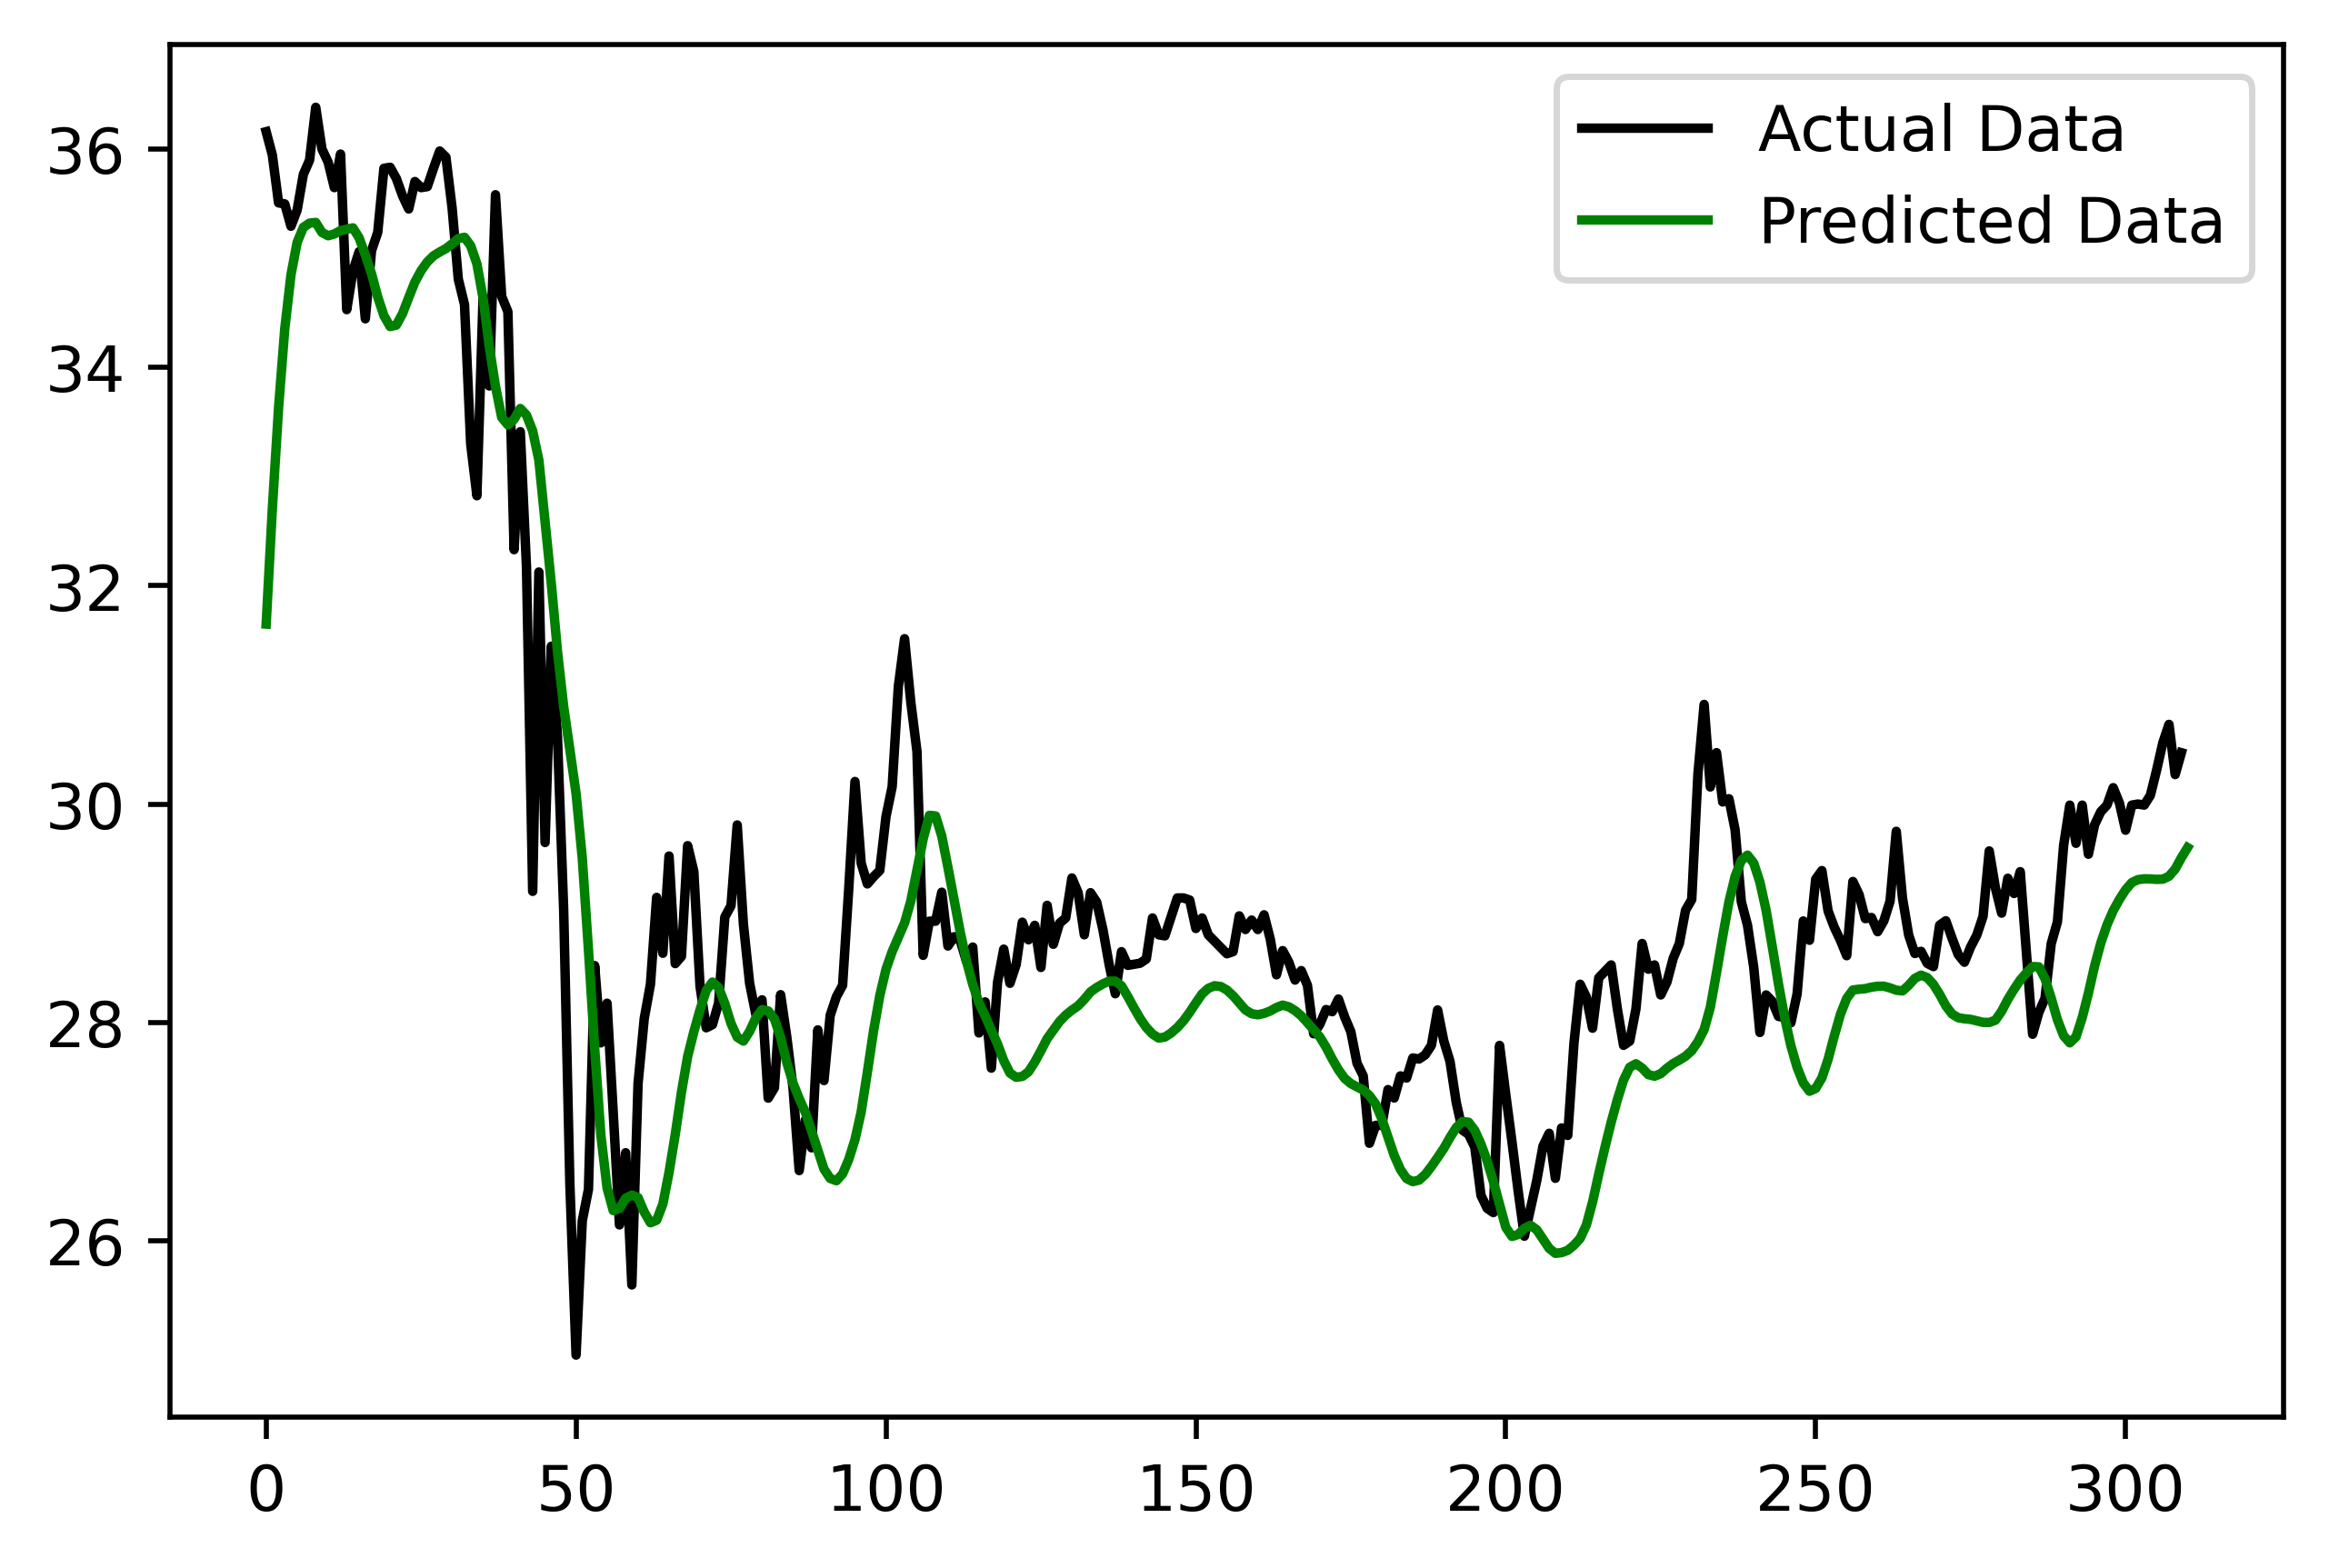

Testing ended for T
Testing started for TMUS
((316, 21, 1), (315,), 'TMUS')


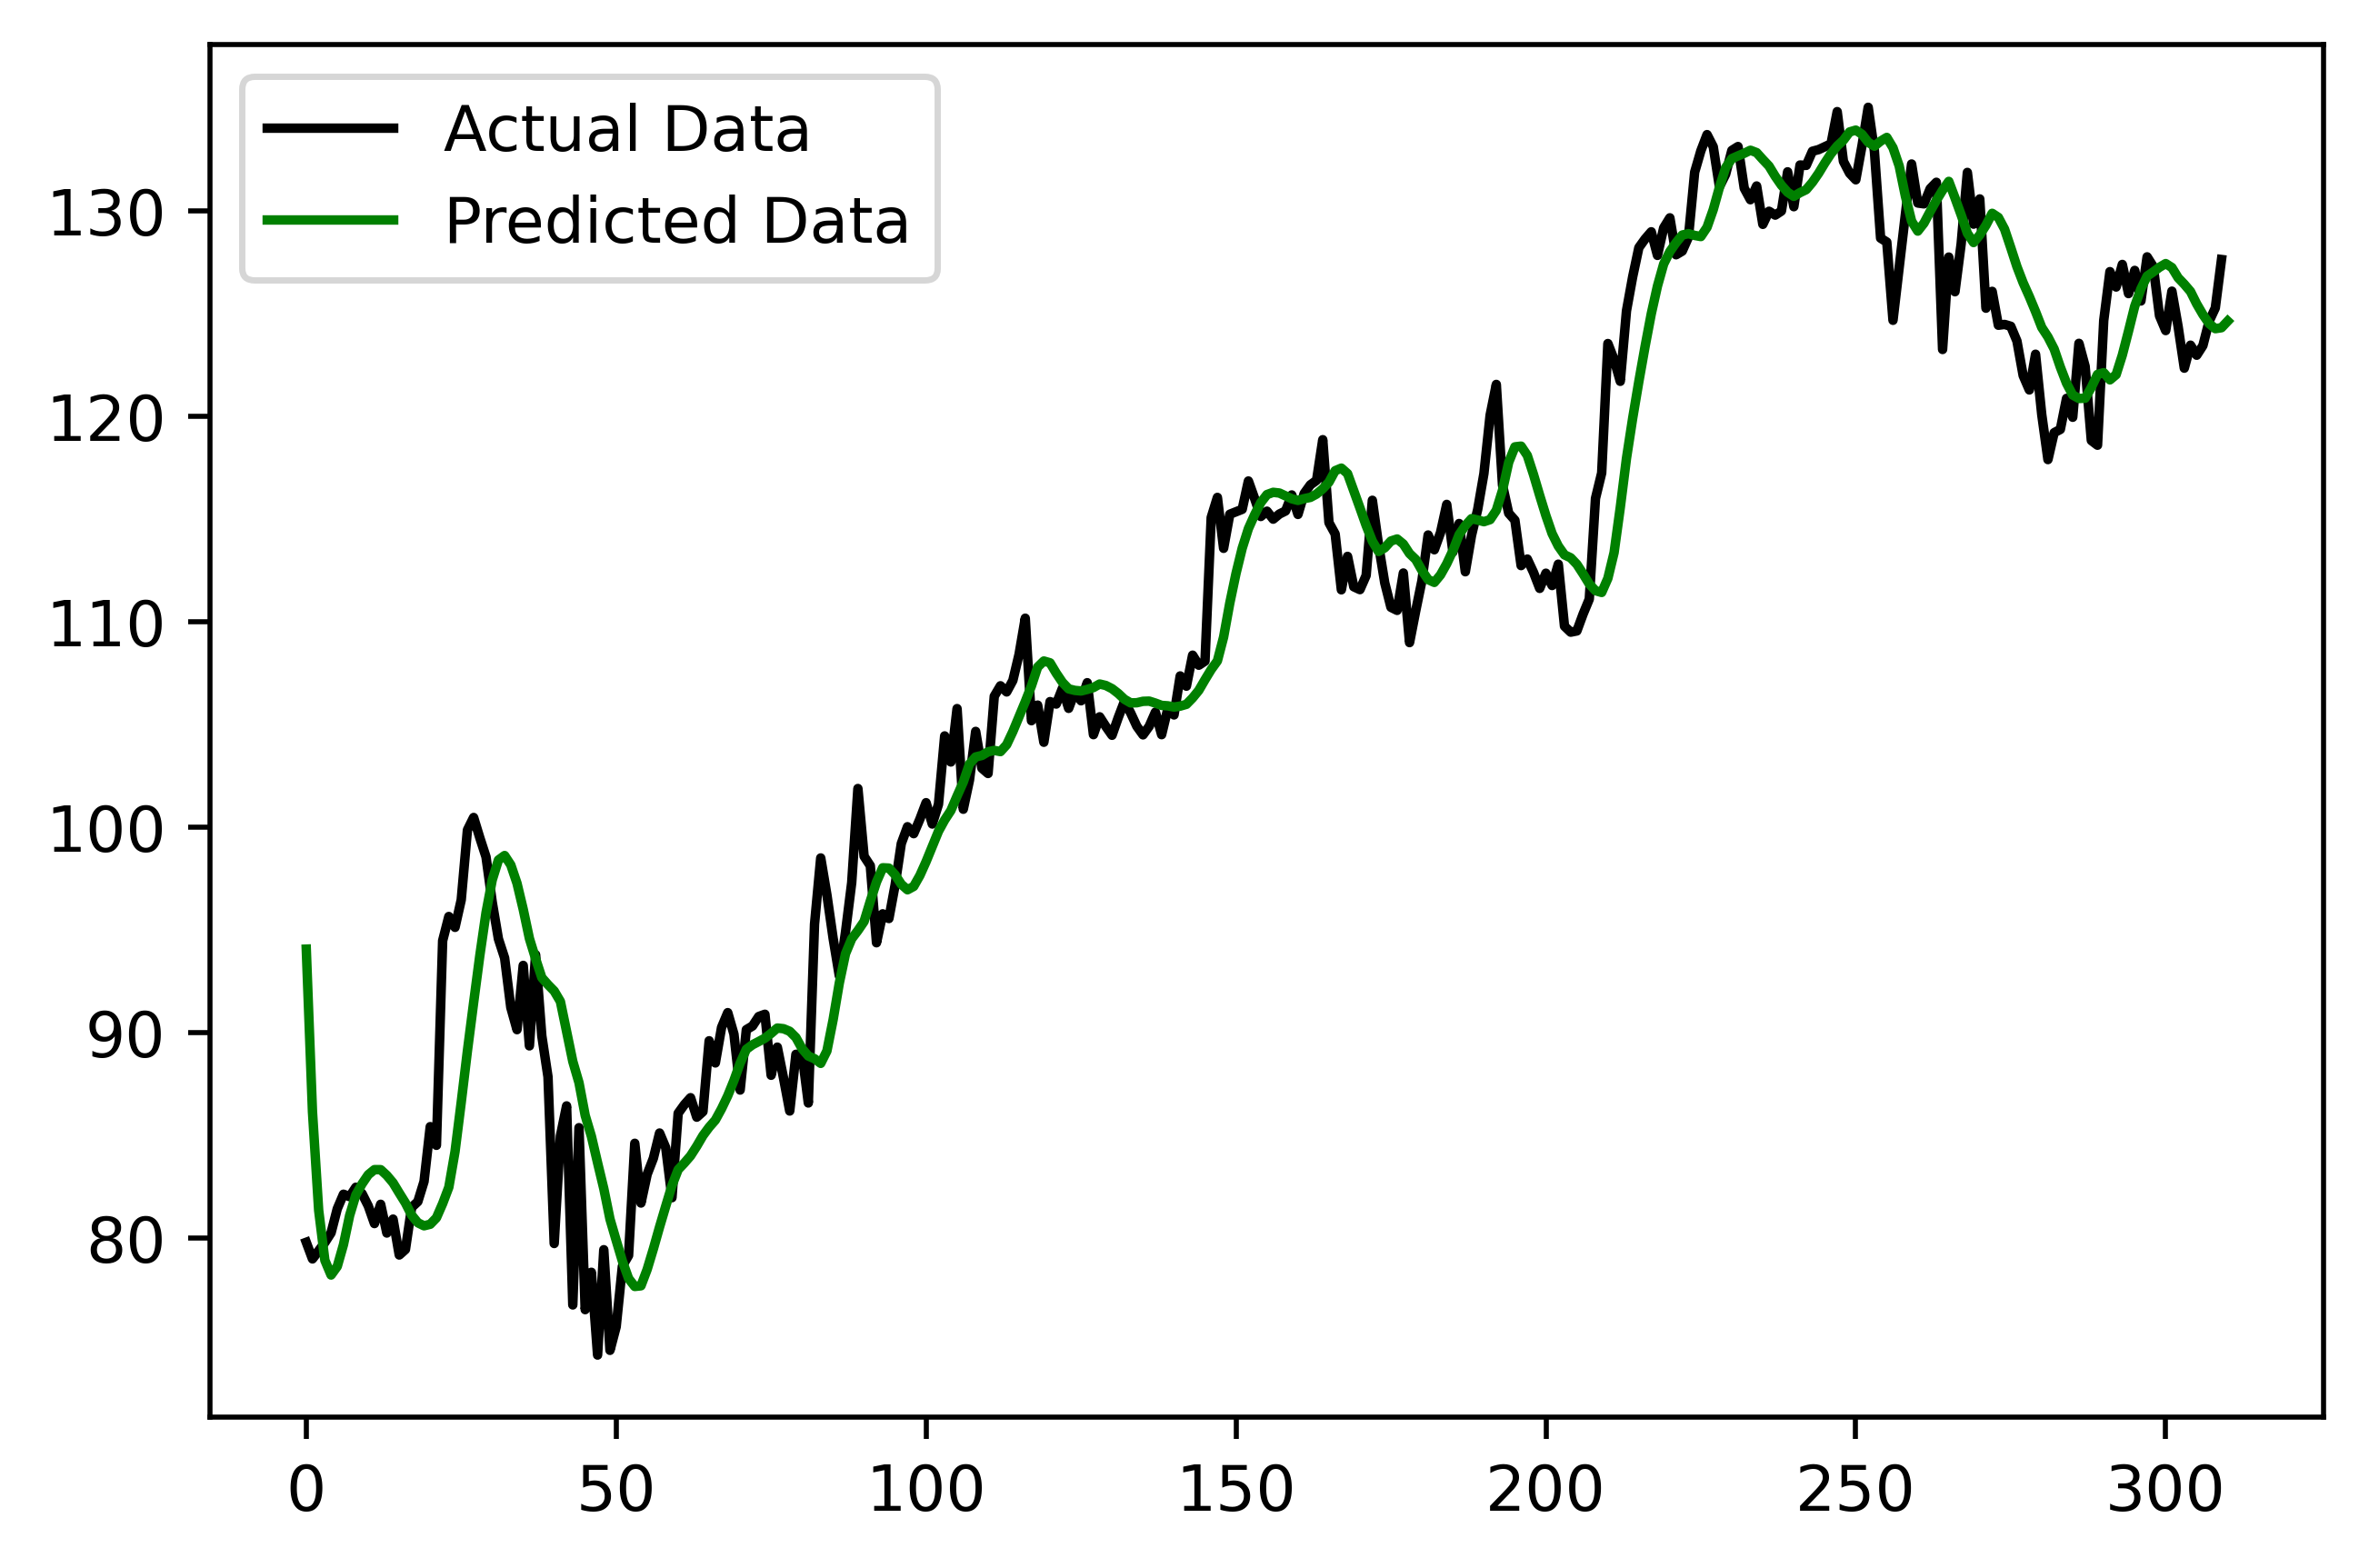

Testing ended for TMUS


In [34]:
for c in pd.read_excel('/content/drive/MyDrive/SentStock/tickers.xlsx',header=None)[0][0:2] :
  print("Testing started for "+c)
  dtst = pd.concat((data[f'{c}']['Close'].dropna(),tdata[f'{c}']['Close'].dropna()),axis=0)
  y_test=tdata[f'{c}']['Close'].dropna().values
  dtst = dtst[len(dtst)-len(tdata)-pred_days:].values.reshape(-1,1)
  dtst =sc.transform(dtst) 
  x_test=[]

  for x in range(pred_days ,len(dtst)) :
    x_test.append(dtst[x-pred_days:x ])

  x_test,y_test = np.array(x_test),np.array(y_test)
  x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  print((x_test.shape, y_test.shape,c))
  preds=model.predict(x_test)
  preds = sc.inverse_transform(preds)
  save_plot(y_test,preds,name=f'{c}_{str(dt.datetime.now())}')
  print("Testing ended for "+c)